In [1]:
import warnings
from numba import jit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [2]:
# READ DATASET
df = pd.read_csv('./kendaraan_train_clean.csv')
df.sample(8)


,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
223975,0.019486,1.129876,0.188935,-0.958967
51633,-1.036904,-0.883035,-1.628230,-1.583727
63953,-0.970880,0.123421,0.756800,1.209319
35457,-0.970880,1.439555,0.756800,-1.644978
118169,1.009851,-1.424972,-1.628230,-1.056968
233803,0.217559,0.123421,-1.628230,-0.138203
161280,1.934192,-1.424972,-1.987878,-0.971217
43464,-0.310636,0.123421,0.226793,0.694811


In [3]:
SELECTED_COLUMN=["Kanal_Penjualan", "Umur"]
df_clean = df[SELECTED_COLUMN]
df_clean.head()

,Kanal_Penjualan,Umur
0,0.756800,-0.574734
1,-1.571444,0.613705
2,0.908230,-1.168953
3,0.226793,1.273948
4,-0.454644,0.745754


In [17]:
@jit #comment this line if you can't run this file
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))
    
def initCentroid(k, df):
  return {i: df[random.randint(0, len(df))] for i in range(k)}

@jit
def kmeans(k, max_iter, df):
    centroid = initCentroid(k, df)
    sum_wcss = 0
    print("="*40)
    print("INIT CENTROID")
    for i in range(k):
      print(f"Klaster {i+1}: {centroid.get(i)}")

    temp_centroid = centroid.copy()
    for i in range(max_iter):
        cluster = {i: [] for i in range(k)}
        tmp = []        
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            tmp.append(min(dist))
            cluster[dist.index(min(dist))].append(x)
        sum_wcss = sum(tmp)
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)
        print("="*40)
        print(f"ITERASI KE-{i+1}")
        for cl in range(k):
          print(f"Klaster {cl+1}: {centroid.get(cl)}")        
        isMatch = True
        for j in range(k):
          if (temp_centroid.get(j) != centroid.get(j))[0]:
            isMatch = False
        if isMatch:
          print(f"BERHENTI PADA ITERASI KE {i+1}")
          break
        temp_centroid = centroid.copy()
    return centroid, cluster, sum_wcss

In [7]:
data = df_clean.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 3
max_iter = 100

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster, _ = kmeans(k, max_iter, data)

INIT CENTROID
Klaster 1: [-1.85537621  2.52841128]
Klaster 2: [0.81358597 0.01948557]
Klaster 3: [ 0.         -0.83883112]
ITERASI KE-1
Klaster 1: [-1.47571894  1.38377282]
Klaster 2: [0.47465625 0.29788468]
Klaster 3: [ 0.18756806 -0.75861171]
ITERASI KE-2
Klaster 1: [-1.53455351  0.96041113]
Klaster 2: [0.39361316 0.52733027]
Klaster 3: [ 0.61751868 -0.89004427]
ITERASI KE-3
Klaster 1: [-1.6376856   0.77273262]
Klaster 2: [0.31727565 0.72338158]
Klaster 3: [ 0.7089212  -0.84164245]
ITERASI KE-4
Klaster 1: [-1.6387598   0.77148705]
Klaster 2: [0.3060328  0.80981516]
Klaster 3: [ 0.69485863 -0.80680244]
ITERASI KE-5
Klaster 1: [-1.63882724  0.77140763]
Klaster 2: [0.30629381 0.85169687]
Klaster 3: [ 0.68625014 -0.79131431]
ITERASI KE-6
Klaster 1: [-1.63878647  0.77137411]
Klaster 2: [0.30485724 0.88603826]
Klaster 3: [ 0.6802603 -0.777814 ]
ITERASI KE-7
Klaster 1: [-1.63875929  0.77136259]
Klaster 2: [0.30425667 0.8870657 ]
Klaster 3: [ 0.68032278 -0.77730139]
ITERASI KE-8
Klaster 1: [

In [8]:
# membuat dataframe hasil clustering
df_cluster = []
for key in cluster.keys():
    for c in cluster.get(key):
        df_cluster.append((c[0], c[1], key))

df_cluster = pd.DataFrame(df_cluster)
df_cluster.columns = SELECTED_COLUMN + ['Cluster']
df_cluster.sample(8)

,Kanal_Penjualan,Umur,Cluster
159166,0.756800,-0.904855,2
147095,0.756800,-1.036904,2
52631,-1.628230,0.811778,0
42163,-1.628230,0.085510,0
281736,0.756800,-0.178588,2
235074,0.756800,-0.904855,2
253941,0.226793,-0.046539,2
111444,0.756800,0.283583,1


In [9]:
# membuat dataframe sesuai dengan cluster yang ada
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

clusterize.columns = col
clusterize.sample(8)

,Cluster 1,Cluster 2,Cluster 3
119950,NaN,NaN,"[0.75679954, -0.706782401]"
114526,NaN,NaN,"[0.75679954, -0.970879844]"
30616,"[-1.912162643, 2.396362561]","[0.226792865, 2.528411283]","[0.75679954, -0.706782401]"
38237,"[-1.628230496, 0.415631734]","[0.75679954, 1.207924065]","[0.908230018, -1.036904205]"
142128,NaN,NaN,"[0.908230018, -1.168952927]"
69200,"[-1.628230496, -0.310636235]",NaN,"[0.75679954, -0.970879844]"
89528,NaN,NaN,"[0.75679954, -0.904855483]"
32185,"[-1.628230496, 1.868167674]","[0.226792865, 0.217558652]","[0.75679954, -0.508709318]"


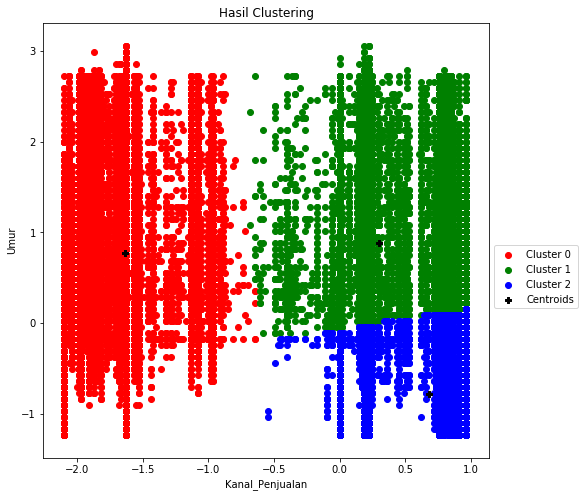

In [10]:
colors = ['r', 'g', 'blue', 'black']

plt.figure(figsize=(8, 8))
plt.title('Hasil Clustering')
for i in range(k):
    plt.scatter(
        df_cluster[SELECTED_COLUMN[0]][df_cluster['Cluster'] == i], 
        df_cluster[SELECTED_COLUMN[1]][df_cluster['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )
    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')
plt.xlabel(SELECTED_COLUMN[0])
plt.ylabel(SELECTED_COLUMN[1])
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

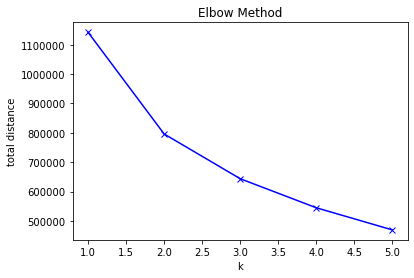

In [11]:
distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    distances.append(km.inertia_)

plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()

INIT CENTROID
Klaster 1: [ 0.73787073 -0.90485548]
ITERASI KE-1
Klaster 1: [-2.53017327e-11 -1.29960035e-11]
ITERASI KE-2
Klaster 1: [-2.53017327e-11 -1.29960035e-11]
BERHENTI PADA ITERASI KE 2
INIT CENTROID
Klaster 1: [ 0.75679954 -0.17858751]
Klaster 2: [-1.6282305   1.27394843]
ITERASI KE-1
Klaster 1: [ 0.58480331 -0.38363771]
Klaster 2: [-1.41489889  0.92818998]
ITERASI KE-2
Klaster 1: [ 0.59601976 -0.4404329 ]
Klaster 2: [-1.30240247  0.96241926]
ITERASI KE-3
Klaster 1: [ 0.60323406 -0.47582503]
Klaster 2: [-1.23290782  0.97250543]
ITERASI KE-4
Klaster 1: [ 0.60814431 -0.49982214]
Klaster 2: [-1.18650688  0.97516723]
ITERASI KE-5
Klaster 1: [ 0.61146869 -0.51537298]
Klaster 2: [-1.15690946  0.9750947 ]
ITERASI KE-6
Klaster 1: [ 0.61180134 -0.51892223]
Klaster 2: [-1.15034865  0.97571131]
ITERASI KE-7
Klaster 1: [ 0.61254341 -0.52087331]
Klaster 2: [-1.14652893  0.97494529]
ITERASI KE-8
Klaster 1: [ 0.61514032 -0.52987459]
Klaster 2: [-1.12949904  0.9729371 ]
ITERASI KE-9
Klaster 1

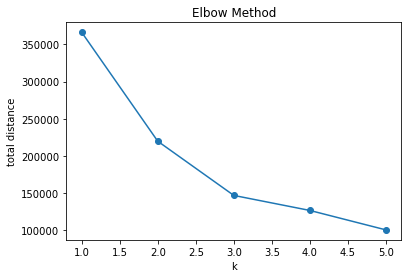

In [18]:
distances = []
cluster_all = []
K = range(1,6)
for k in K:
    _, _, w = kmeans(k,100,data)
    distances.append(w)

plt.plot(K, distances, marker='o')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()